# Section 1. Julia without tears: together we are stronger

---

In this notebook, we start using Julia on simple examples. In case the reader finds herself still thirsty after the end of this first lecture, peerless references from which the author is greateful to be pinned down are (i) [Julia Documentation](https://docs.julialang.org/en/v1/) and (ii) [QuantEcon Introduction](https://julia.quantecon.org/getting_started_julia/julia_by_example.html).

### Example. White noise process

Suppose one wants to simulate a white noise process $\{\varepsilon_t\}_{t=1}^T$, where $\varepsilon_t \overset{iid}{\sim} N(0,1)$.

In order to recover a single draw from a standard Normal distribution, the built-in function `randn` does the job, i.e.

In [4]:
rand()

0.4146142049602247

but, naturally, more complex functionalities will require the usage of particularly useful packages. For these purposes, `using XXX` loads the content of XXX-package into the current scope.

For example, we can use the packages `Distributions` and `Plots` to work with a great set of well-known distributions and plot them in fancy figures, respectively. In the case of the white noise previously posed, assuming $T=100$, we have:

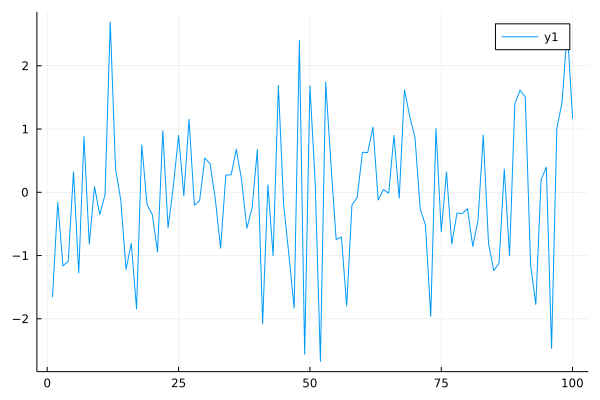

In [17]:
# loading the packages
using Distributions
using Plots

# setting sample size
T = 100

# extracting a white noise process sample
ε = randn(T)

# plotting the dispersion of white noise in time
plot(1:T,ε)

Note that, since Julia is a language designed for mathematical and scientific computing, great support is available. A first-distinguishable one is that we can use unicode characters as $\varepsilon$, for which is sufficient to type the LaTeX code along with a TAB.

In this sense, one can investigate the type of elements in Julia by using `typeof` function, that is,

In [8]:
typeof(ε)

Vector{Float64} (alias for Array{Float64, 1})

and from which we could extract a subset of values as in

In [10]:
ε[1:3]

3-element Vector{Float64}:
  1.54857555582506
  0.07253060935788033
 -0.010045513467296475

## 1.1. For Loops in Julia

Just for the sake of learning and practicing, we can rewrite the problem of randomly extracting Normal-distributed values using a `for` loop.

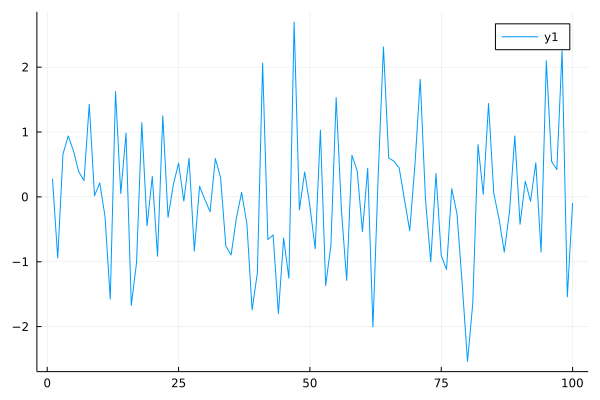

In [16]:
# building a white-noite sample in brute force

for i in 1:T
    ε[i] = randn()
end

plot(1:T,ε)

From such a lean code, the reader may get confused as to what is actually going on, so the step-by-step can be seen as

1. define a vector $\varepsilon$ of length $T$
2. initialize a for loop in which, for each value $i$ from 1 to $T$, it successively calls `randn` to populate the array with a Normal-distributed value
3. indicates the `end` of the procedure

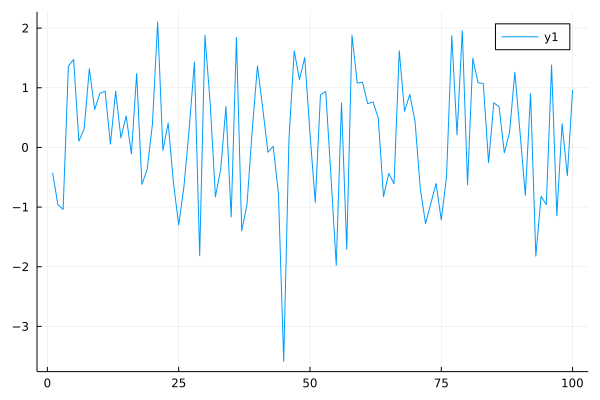

In [19]:
# building a white-noite sample in brute force

for i in eachindex(ε)
    ε[i] = randn()
end

plot(1:T,ε)

## 1.2. User-Defined Functions

Suppose you do not want to fullfill a vector one and one-time-only, instead you want to do it several times and for different vectors in terms of its lengths. After the second or third time that you do the almost-same job, it is quite natural to feel the lack of efficiency from the procedure.

In these cases, defining a `function` that depends on specific variables is usually a good alternative. The following code, for example, defines a function called `generatedata` which requires that one posts any integer $n$ so it creates a vector $\varepsilon$ of length $n$ and fullfills it with the squared-white-noise values.

In [22]:
function generatedata(n)
    ε = zeros(n)
    for i in 1:n
        ε[i] = randn()^2
    end
    return ε
end

generatedata (generic function with 1 method)

Note that the chunk above solely defined the function of interest, in which

* `function` is a Julia keyword that indicates the start of a function definition

* `generatedata` is an arbitrary name for the function

* `return` is a keyword indicating the return value, as is often unnecessary

Now we can apply it for different values of vector lengths:

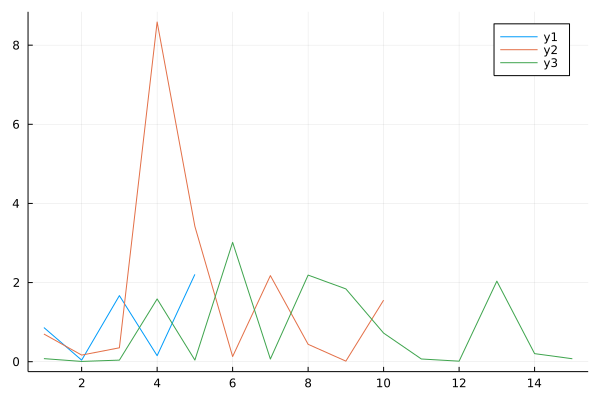

In [29]:
data5 = generatedata(5)
data10 = generatedata(10)
data15 = generatedata(15)

plot([data5,data10,data15])

## 1.3. Broadcasting: the dot

First, notice that, since the for loop was not necessary to fullfill a vector of interest, but we could set the length directly to the `randn` function, then we can define a cleaner and better function:

In [32]:
function generatedata2(n)
    ε = randn(n)
    return ε.^2
end

data2 = generatedata2(5)

5-element Vector{Float64}:
 3.1644782788430463
 0.020060600979529147
 0.27634786443901144
 0.002542061545555476
 1.0216351984107146

where we have broadcasted the `^2` square function over a vector using `.`, i.e. applying the square-operator over each element of the vector.

To be clear, unlike Python, R, and MATLAB (to a lesser extent), the reason to drop the for is **not** for performance reasons, but rather because of code clarity.

Loops of this sort are at least as efficient as vectorized approach in compiled languages like Julia, so use a for loop if you think it makes the code more clear.

Actually, note that we can even drop the `function` itself if we define it on a single line, that is,

In [33]:
generatedata3(n) = randn(n).^2

# applying
data3 = generatedata3(5)

5-element Vector{Float64}:
 1.751148532445365
 0.4864495328495533
 0.27936885941680745
 0.6275673461925373
 0.022576048816439088

and we can broadcast *any* function, i.e. `^x` is just a particular case. In this spirit, we can define a `square` function and apply that directly do `randn`:

In [34]:
square(x) = x^2
generatedata4(n) = square.(rand(n))

# applying
data4 = generatedata4(5)

5-element Vector{Float64}:
 0.4054939753751499
 0.2806752606759451
 0.00433492017532169
 0.00309019465186331
 0.20436040589631177

Finally appealing to an abstract instance, we can make the `generatedata` function able to generically apply to a function `f`, i.e.

In [36]:
generatedatax(n, f) = f.(randn(n)) # uses broadcast for some function `gen`
datax = generatedatax(5, square) 

5-element Vector{Float64}:
 0.3266834138877542
 0.6826614294906634
 3.0195161382667943
 0.22450242688459138
 0.029107573838019558

**Remark:** High degrees of abstraction and generality, e.g. passing in a function f in this case, can make code either clearer or more confusing, but Julia enables you to use these techniques **with no performance overhead**.

For this particular case, the clearest and most general solution is probably the simplest.

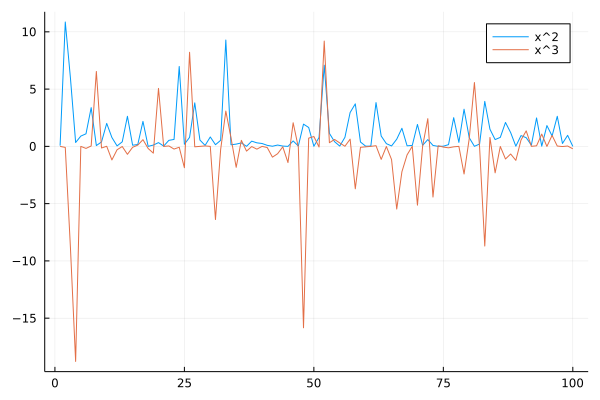

In [40]:
# direct solution with broadcasting, and small user-defined function
plot(generatedatax(100, square), label="x^2")
plot!(generatedatax(100, y -> y^3), label="x^3") # layer on the same plot

While broadcasting somehow looks like vectorizing functions in MATLAB, or Python ufuncs, it is much richer and built on core foundations of the language.

Also, the other additional function `plot!` adds a graph to the existing plot.

Actually, this follows a general convention in Julia, where a function that modifies the arguments or a global state has a `!` at the end of its name.

## 1.4. A slightly more useful function

This function will be passed in a choice of probability distribution and respond by plotting a histogram of observations.

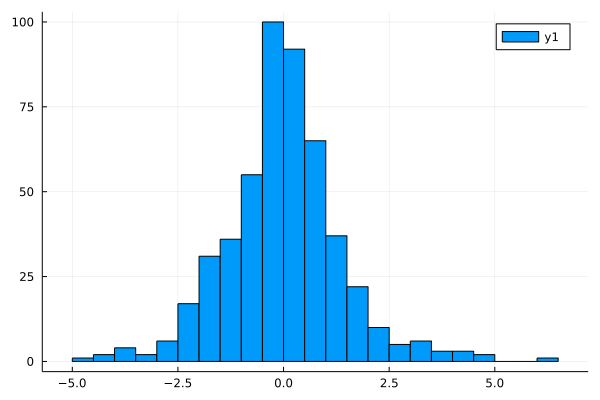

In [41]:
function plothistogram(distribution, n)
    ϵ = rand(distribution, n)  # n draws from distribution
    histogram(ϵ)
end

lp = Laplace()  # an "instance" of a `Distribution` type. We are going to study it properly later!
plothistogram(lp, 500)

Let us have a casual discussion of how all this works while leaving technical details for later in next lectures:

* `lp = Laplace()` creates an instance of a data type defined in the `Distributions` module that represents the Laplace distribution

* The name `lp` is bound to this value

* When we make the function call `plothistogram(lp, 500)` the code in the body of the function `plothistogram` is run with

    * the name `distribution` bound to the same value as `lp`

    * the name `n` bound to the integer `500`

### Extra. Here is a Mystery!

Again, consider the function named `rand(distribution,n)`. Note that this looks like something of a mystery, doesn't it?

The function `rand()` is defined in the base library such that `rand(n)` returns `n` uniform random variables on:

In [42]:
rand(3)

3-element Vector{Float64}:
 0.2658259241911294
 0.801986336983337
 0.29346359296968383

On the other hand, we just got that distribution points to a data type representing the Laplace distribution that has been defined in a third party package.

> So how can it be that rand() is able to take this kind of value as an argument and return the output that we want?

The answer in a nutshell is **multiple dispatch**, which Julia uses to implement **generic programming**.

* This refers to the idea that functions in Julia can have different behavior depending on the particular arguments that they’re passed.

* Hence, in Julia we can take an existing function and give it a new behavior by defining how it acts on a new type of value.

* The compiler knows which function definition to apply to in a given setting by looking at the types of the values the function is called on.

* In Julia these alternative versions of a function are called **methods**.